In [3]:
import pandas as pd
import numpy as np

In [ ]:
# 모평균 신뢰구간

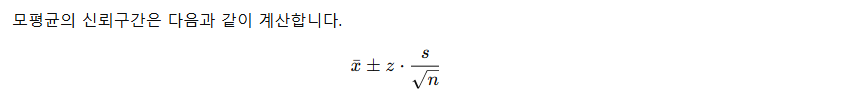

In [5]:
# 표본수 49, 표본평균 100, 표본표준편차 5인 표본이 있을 때,
# 모평균의 95% 신뢰구간을 구하시오.
# (P (z < 1.96) = 0.975, P(z < 1.65) = 0.95)

n = 49
mean = 100
std = 5

low = mean - 1.96 * std / np.sqrt(n)
up = mean + 1.96 * std / np.sqrt(n)

low, up

(98.6, 101.4)

In [ ]:
########################################################################################################################

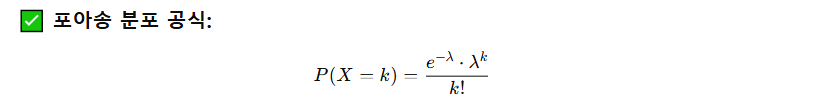

In [6]:
# 어느 기관에서 시간당 10건의 전화를 받는다. 5분 내에 1건 이상 전화 받을 확률은?
from scipy.stats import poisson

# 시간당 10건 -> 60분당 10건 
# 평균 발생 건수 (lambda): 5분 동안 평균 0.8333건
lambda_5min = 10 * (5 / 60)

# P(X >= 1) = 1 - P(X = 0)
prob_at_least_one = 1 - poisson.pmf(0, lambda_5min)

print(f"5분 내에 1건 이상 전화 받을 확률: {prob_at_least_one:.4f}")

5분 내에 1건 이상 전화 받을 확률: 0.5654


In [13]:
# 이항분포 B(n=100, p=0.02)를 포아송 분포로 근사하여 X = 0일 확률?
from scipy.stats import poisson

n = 100
p = 0.02
ld = n * p

poisson.pmf(0, ld)

0.1353352832366127

In [7]:
# 3개 증권사에서 증권사별 5개 펀드 처리 제곱합이 64, 총제곱합이 100일 때 F의 값
k = 3 # 증권사 수 (요인 수준 수)
N = 3 * 5 # 증권사 수 * 펀드 수 = 총 관측값 N
SSB = 64 # 처리 제곱합 
SST = 100 # 총제곱합
SSE = SST - SSB # 오차 제곱합

# 자유도 계산
dfB = k - 1 # 처리 자유도
dfW = N - k # 오차 자유도 

# 평균제곱계산
MSB = SSB / dfB
MSE = SSE / dfW

# F-통계량
F = MSB / MSE

F

10.666666666666666

In [16]:
# 어떤 버스는 시간 당 평균 5대의 호출 요청을 받을 때, 시간 당 3대 이상의 호출을 받을 확률은?
from scipy.stats import poisson

# 평균 호출 수 (lambda)
lam = 5

# P(X >= 3) = 1 - P(X <= 2)
prob = 1 - poisson.cdf(2, lam)

print(f"시간당 3대 이상의 호출을 받을 확률: {prob:.4f}")

시간당 3대 이상의 호출을 받을 확률: 0.8753


In [17]:
# 책상을 만드는데 걸리는 시간이 20분일 때, 신발 한 개를 만드는 데 걸리는 시간이 30분일 확률은?
import math

# 평균 시간 20분 => lambda = 1/20
lam = 1/20

# P(T >= 30)
prob = math.exp(-lam * 30)

print(f"신발 한 개 만드는 데 30분 이상 걸릴 확률: {prob:.4f}")

신발 한 개 만드는 데 30분 이상 걸릴 확률: 0.2231


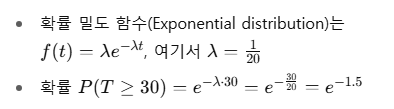

In [25]:
# 다음 값은 회귀 분석에 대한 평균제곱합이다.
# 결정계수 R^2를 구하시오
#            자유도 | 평균제곱
# 회귀모형 |     2  |    1521
#    잔차 |    27  |      45


# 평균제곱과 자유도
ms_reg = 1521
df_reg = 2
ms_res = 45
df_res = 27

# 제곱합 계산
ssr = ms_reg * df_reg
sse = ms_res * df_res
sst = ssr + sse

# 결정계수
r_squared = ssr / sst
print(f"R^2 = {r_squared:.4f}")

R^2 = 0.7146


In [ ]:
# 다음 값은 회귀 계수에 대한 검정이다.
# F 값을 구하시오
#               SS | 자유도
# 회귀모형 |   3042 |     2
#    잔차 |   1215 |      
#    전체 |        |    29

# 잔차 자유도 = 전체 자유도 - 회귀 자유도 = 29 - 2

# 평균 제곱 (MS) 계산 
# MS회귀 = SS회귀 / df회귀 = 3042 / 2 = 1521
# MS잔차 = SS잔차 / df잔차 = 1215 / 27 = 45

# F = MS회귀 / MS잔차 = 1521 / 45 = 33.8

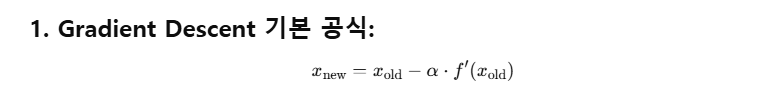

In [8]:
# loss 함수 = f(x) = 0.25x^4 - x^3 - 2x^2 + 12x + 2
# 초기값이 x = 1일 때, Gradient Descent 방법을 2번 적용한 후의 x는?
# 학습률은 0.5

# 함수 f(x)의 도함수 정의
def grad_f(x):
    return x**3 - 3*x**2 - 4*x + 12

# 초기값과 학습률
x = 1
learning_rate = 0.5

# Gradient Descent 2회 수행
for i in range(2):
    gradient = grad_f(x)
    x = x - learning_rate * gradient
    print(f"Step {i+1}: x = {x}")

print(f"\n최종 x 값: {x}")

Step 1: x = -2.0
Step 2: x = -2.0

최종 x 값: -2.0


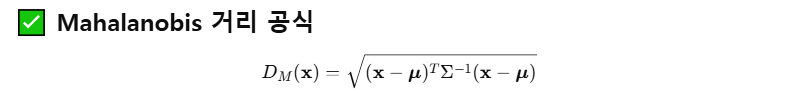
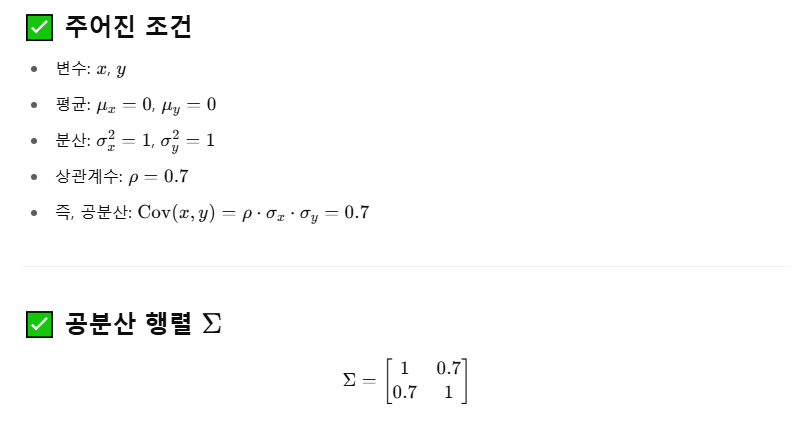
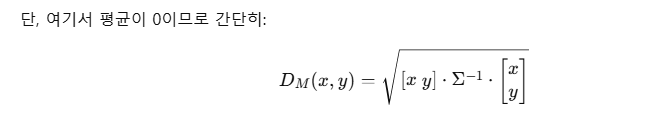

In [9]:
# 변수 x, y의 평균이 0, 분산이 1, 둘의 상관관계 0.7일 때,
# 각 샘플에 대한 Mahalanobis distance는?

import numpy as np
from scipy.spatial.distance import mahalanobis

# 공분산 행렬
cov = np.array([[1, 0.7],
                [0.7, 1]])

# 공분산 행렬의 역행렬
inv_cov = np.linalg.inv(cov)

# 평균 벡터
mean = np.array([0, 0])

# 예시 샘플들
samples = np.array([
    [1, 1],
    [0, 0],
    [2, -1],
    [-1, -1]
])

# Mahalanobis 거리 계산
for i, sample in enumerate(samples):
    dist = mahalanobis(sample, mean, inv_cov)
    print(f"샘플 {i+1} {sample}의 Mahalanobis 거리: {dist:.4f}")

샘플 1 [1 1]의 Mahalanobis 거리: 1.0847
샘플 2 [0 0]의 Mahalanobis 거리: 0.0000
샘플 3 [ 2 -1]의 Mahalanobis 거리: 3.9108
샘플 4 [-1 -1]의 Mahalanobis 거리: 1.0847


In [ ]:
# K-medoids 군집에서 같은 군집인 점 a, b, c의 거리가 다음과 같다.
# d(a, b) = 2, d(b, c) = 6, d(a, c) = 5
# Medoid는?

#Medoid는 K-Medoids 군집 알고리즘에서 각 군집(cluster)을 대표하는 중심점
# 하지만 K-means의 중심(centroid)과는 다르다.

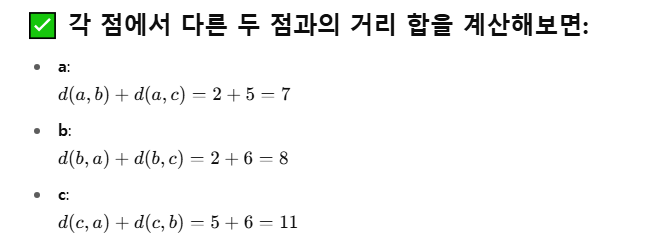

In [ ]:
# 거리합이 가장 작은 a가 medoid

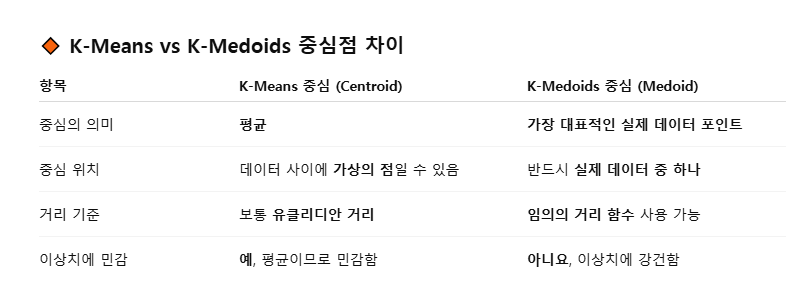

In [ ]:
# x, y 좌표로 {(1, 0), (1, 1)} {(3, 3), (3, 2)} 와 같이 군집일 때,
# (1, 0) 좌표의 실루엣 계수는? (거리 측도는 맨하탄)

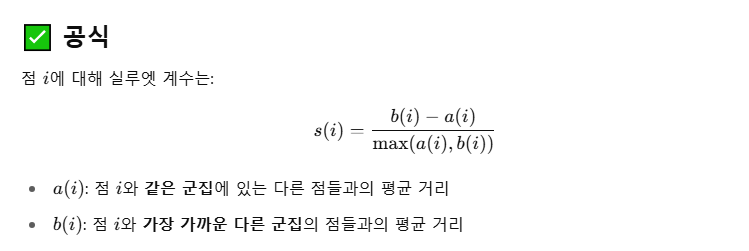

In [10]:
def manhattan(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

# 데이터 정의
cluster_A = [(1, 0), (1, 1)]
cluster_B = [(3, 3), (3, 2)]
target = (1, 0)

# a(i): 같은 군집 내 평균 거리 (자신 제외)
a_i = sum(manhattan(target, other) for other in cluster_A if other != target) / (len(cluster_A) - 1)

# b(i): 가장 가까운 다른 군집의 평균 거리
b_i = sum(manhattan(target, other) for other in cluster_B) / len(cluster_B)

# 실루엣 계수 계산
s_i = (b_i - a_i) / max(a_i, b_i)

print(f"실루엣 계수: {s_i:.3f}")

실루엣 계수: 0.778


In [ ]:
# CNN

In [12]:
# CNN에서 32x32 이미지에 4x4 filter (Stride 2)를 padding 없이 거쳤을 때 생성되는 이미지의 크기

((32 - 4) / 2) + 1, ((32 - 4) / 2) + 1

(15.0, 15.0)

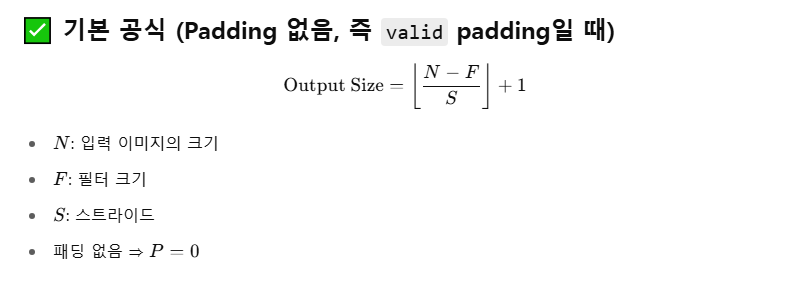

In [14]:
# 합성곱 신경망에서 원본 이미지가 5 x 5, 스트라이드 1, 필터 크기 3 x 3, 패딩 1일 때 Feature Map은?
n = 5
s = 1
p = 1
f = 3

(((n + 2 * p - f) / s) + 1), (((n + 2 * p - f) / s) + 1)

(5.0, 5.0)

In [15]:
# 원본 이미지가 5 X 5, Stride 1, 필터가 3 x 3 => feature map = 3 x 3

n = 5
s = 1
p = 0
f = 3

(((n + 2 * p - f) / s) + 1), (((n + 2 * p - f) / s) + 1)

(3.0, 3.0)

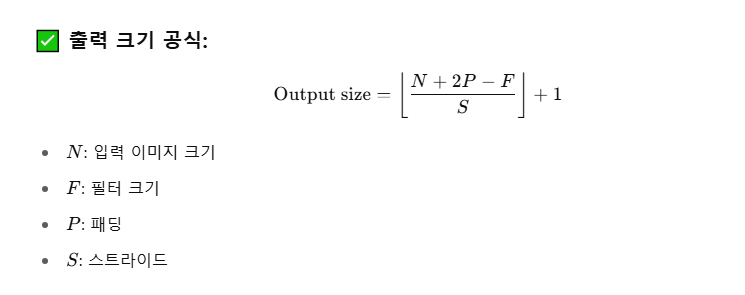

In [ ]:
# 요일별 강수량 기대 비율과 실제 관측량
# Expected(%) 10, 10, 15, 20, 30, 15 
# Observed Value 30 , 14, 34, 45, 57, 20
# Expected Value 20, 20, 30, 40, 60, 30

In [18]:
import numpy as np

# 관측값과 기대값
observed = np.array([30, 14, 34, 45, 57, 20])
expected = np.array([20, 20, 30, 40, 60, 30])

# 카이제곱 통계량 계산
chi_squared = np.sum((observed - expected) ** 2 / expected)

print(f"Chi-squared statistic: {chi_squared:.2f}")

Chi-squared statistic: 11.44


In [19]:
from scipy.stats import chisquare
import numpy as np

# 관측값과 기대값
observed = np.array([30, 14, 34, 45, 57, 20])
expected = np.array([20, 20, 30, 40, 60, 30])

# chisquare 함수 사용
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-squared statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Chi-squared statistic: 11.44
P-value: 0.0433


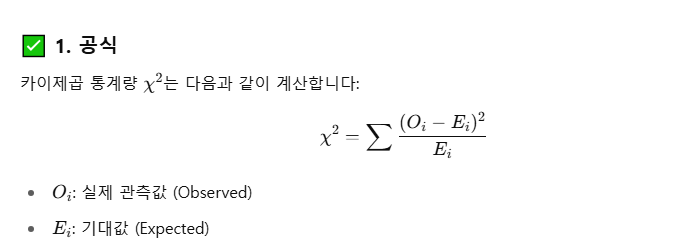

In [23]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# 관측 데이터
observed = np.array([
    [10, 20, 20],  # 남성: 저, 정, 과
    [20, 20, 10]   # 여성: 저, 정, 과
])

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(observed)

# 결과 출력
print(f"Chi-squared statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:\n", expected)

# 개별 결과
expected_male_obese = expected[0, 2]  # 남자이고 과체중
prob_female_normal = expected[1, 1] / expected[1].sum()  # 여자이고 정상체중일 확률

print(f"\n[답변]")
print(f"남자이고 과체중일 기대값: {expected_male_obese:.2f}")
print(f"여자이고 정상체중일 확률: {prob_female_normal:.4f}")


Chi-squared statistic: 6.67
p-value: 0.0357
Degrees of freedom: 2

Expected frequencies:
 [[15. 20. 15.]
 [15. 20. 15.]]

[답변]
남자이고 과체중일 기대값: 15.00
여자이고 정상체중일 확률: 0.4000


In [26]:
# weather가 sunny, sunny, rainy, sunny, sunny, rainy 이고
# temperature가 hot, hot, hot, hot, cool, cool,일때
# 두 변수에 대한 mutual information?

from sklearn.metrics import mutual_info_score

# 데이터
weather = ['sunny', 'sunny', 'rainy', 'sunny', 'sunny', 'rainy']
temperature = ['hot', 'hot', 'hot', 'hot', 'cool', 'cool']

# mutual_info_score expects label-encoded data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
weather_encoded = le.fit_transform(weather)       # ['sunny', 'rainy'] → [1, 1, 0, 1, 1, 0]
temperature_encoded = le.fit_transform(temperature)  # ['hot', 'cool'] → [1, 1, 1, 1, 0, 0]

# Mutual Information 계산
mi = mutual_info_score(weather_encoded, temperature_encoded)
print(f"Mutual Information: {mi:.4f}")

Mutual Information: 0.0306


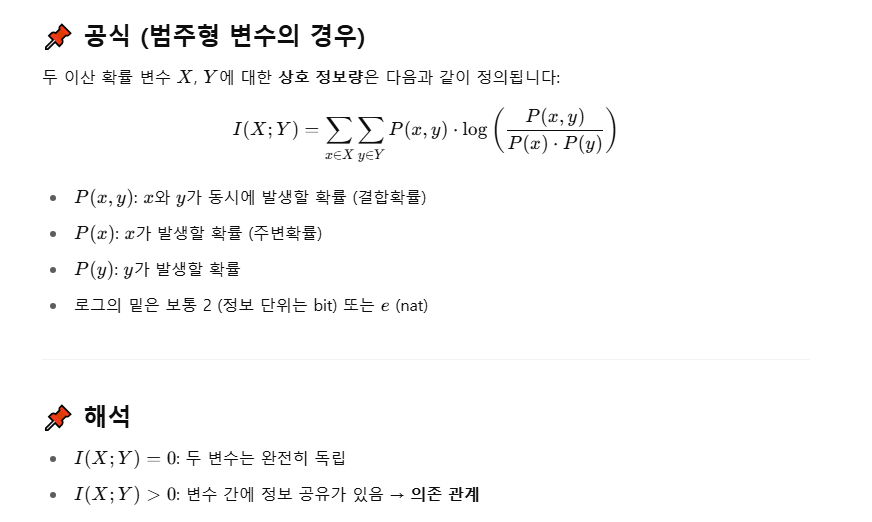

In [ ]:
# 신경망 모델
[입력층]       [은닉층 1]       [은닉층 2]       [출력층]
    x₁ ──────→ h₁^(1) ──────→ h₁^(2) ──────→ ŷ
       \     / ↑   \     / ↑      \     / ↑
        \   /  |    \   /  |       \   /  |
         ↘ ↙   b    ↘ ↙   b        ↘ ↙   b
          x₂ ──────→ h₂^(1) ──────→ h₂^(2)
        
# 입력층 → 은닉층1: 2(input) × 2(hidden) + 2(bias) = 6
# 은닉층1 → 은닉층2: 2 × 2 + 2 = 6
# 은닉층2 → 출력층: 2 × 1 + 1 = 3
# 총 파라미터: 6 + 6 + 3 = 15개

파라미터 수 = (입력 차원 + 1) × 은닉층1 노드 수 
             + Σ (이전 은닉층 노드 수 + 1) × 현재 층 노드 수
             + (마지막 은닉층 노드 수 + 1) × 출력 차원

In [ ]:
# 다른 예시 (입력=4, 은닉층=3개[5,3,2], 출력=1)
# (4+1)×5 + (5+1)×3 + (3+1)×2 + (2+1)×1 = 25 + 18 + 8 + 3 = 54개

In [ ]:
입력층     은닉층        출력층
(3개)      (4개)         (2개)
  o         o             o
  o   -->   o     -->     o
  o         o
            o

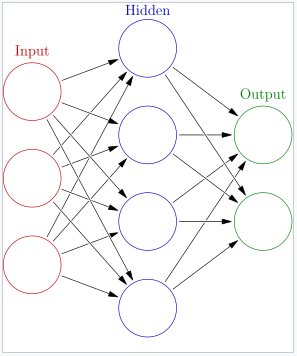

In [ ]:
입력층(Input layer): 3개 노드

은닉층(Hidden layer): 1개 층, 4개 노드

출력층(Output layer): 1개 층, 2개 노드

In [ ]:
레이어 개수
→ 입력층(1) + 은닉층(1) + 출력층(1) = 3개

은닉층 개수
→ 1개

은닉층 노드 수
→ 4개 (1개의 은닉층에 4개의 뉴런)

파라미터 수 (가중치 + 편향)

입력층(3) → 은닉층(4):

가중치: 3 × 4 = 12

편향: 4

은닉층(4) → 출력층(2):

가중치: 4 × 2 = 8

편향: 2

총 파라미터 수 = 12 + 4 + 8 + 2 = 26